### Logistic Regression
For a first pass at Logistic Regression, we will run it on some simulated data that we create.

This is useful to see how well Logistic Regression performs in a situation
where we know what the answer should be.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# We will create some fake data

num_trials = 10000
np.random.seed(seed = 142)

In [3]:
# First we create a "clean" x variable
# "Clean" in this case means that if we knew x_clean exactly, then the prob(y=1|x) would be fixed
# The "clean" value of x is either 1,2,3,4, or 5
# Each one corresponds to a particular probability which we will set below


x_clean = np.random.choice(a=[1,2,3,4,5],p=[.2,.1,.3,.1,.3], size=num_trials)
x_clean[:100]

array([5, 3, 4, 5, 1, 1, 5, 3, 3, 5, 5, 1, 1, 3, 4, 5, 4, 3, 5, 5, 5, 5, 1,
       1, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 1, 5, 5, 5, 5, 3, 1, 5, 5, 3, 1, 1,
       1, 1, 5, 3, 3, 3, 3, 3, 1, 5, 3, 2, 3, 5, 3, 2, 3, 5, 3, 3, 3, 3, 5,
       2, 5, 3, 2, 3, 3, 3, 3, 1, 3, 5, 5, 3, 5, 2, 1, 5, 4, 1, 4, 5, 1, 5,
       5, 1, 3, 3, 3, 3, 5, 3])

In [4]:
# Now we create a "noisy" version of x.  This is the value we actually observe and learn from

x_noisy = x_clean + np.random.normal(size=num_trials)#+np.random.uniform(size=num_trials)

(array([ 2042.,     0.,  1002.,     0.,     0.,  2926.,     0.,  1002.,
            0.,  3028.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

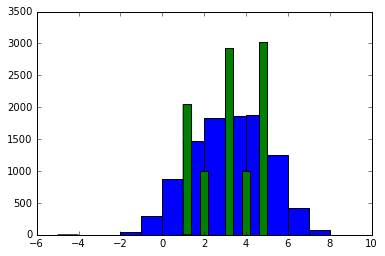

In [5]:
# Plot histograms of the two versions: X_clean and x_noisy 
# Just to understand them better

plt.hist(x_noisy, bins=15, range = [-5,10])
plt.hist(x_clean)

In [6]:
# Here we set the "true probability".  This will be unknown to us, but instead we will see realizations
# of binary 0/1 variables based on these probabilities

true_probs = (x_clean/10)**2  + .1*(x_clean>=4)+ .05*(x_clean>=5)
real_prob_vec = np.unique(true_probs)
real_prob_vec

array([ 0.01,  0.04,  0.09,  0.26,  0.4 ])

In [7]:
# Generate our target y using the probabilities in "true_probs"

y = np.random.binomial(n=1, p=true_probs, size=num_trials)

In [8]:
np.mean(y)

0.17749999999999999

In [9]:
# Divide into train and test sets

X_train = x_noisy[:7000].reshape(-1,1)  #sklearn likes it better to have a 2-D array for X
X_test = x_noisy[7000:].reshape(-1,1)
y_train = y[:7000]
y_test = y[7000:]

X_train.shape

(7000, 1)

In [10]:
# Fit a default Logistic Regression Model
## Note, unlike LinearRegression, the LogisticRegression automatically does a penalized regression


lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Use the model to predict *Probabilities* for the test set

y_prob_pred_mat = lr_model_1.predict_proba(X_test)
y_prob_pred_mat

array([[ 0.94967126,  0.05032874],
       [ 0.95046901,  0.04953099],
       [ 0.77172597,  0.22827403],
       ..., 
       [ 0.78946898,  0.21053102],
       [ 0.96633847,  0.03366153],
       [ 0.77502759,  0.22497241]])

In [12]:
# what comes out of predict_proba is a matrix
# for binary classification, we typically look at the probability of being 1
# So we will take the second column (:1)
y_prob_pred = y_prob_pred_mat[:,1]

(array([ 434.,  630.,  417.,  242.,  218.,  158.,  132.,   91.,   48.,
          34.,   15.,   10.,    2.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

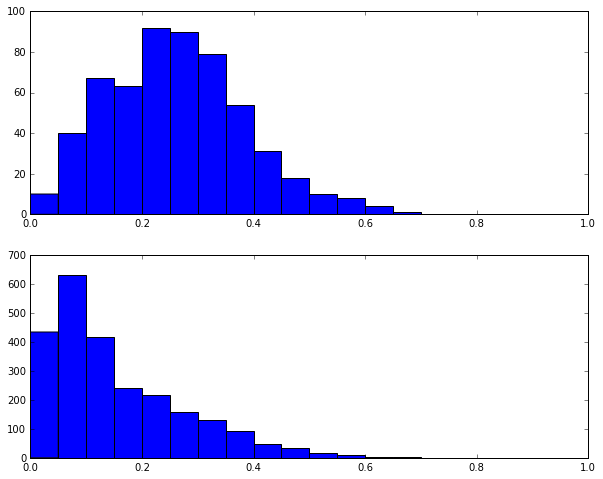

In [13]:
#Let's visualize - is there a difference in how we predict when the true answer is 1 versus 0?
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # 2 Rows, 1 Col

ax[0].hist(y_prob_pred[np.where(y_test==1)], bins=20, range=(0,1))
ax[1].hist(y_prob_pred[np.where(y_test==0)], bins=20, range=(0,1))

In [14]:
## How "good" is this?
## First, lets evaluate the log-likelihood
## sklearn has a "log_loss" function which computes log-likelihood, negates it,
## and then averages by the number of data points
from sklearn.metrics import log_loss

In [15]:
log_loss(y_test,y_prob_pred)

0.42308852639501532

In [16]:
## Alternatively, compute it yourself
pred_prob_of_data = y_test*y_prob_pred + (1-y_test)*(1-y_prob_pred)
np.mean(-np.log(pred_prob_of_data))

0.42308852639501532

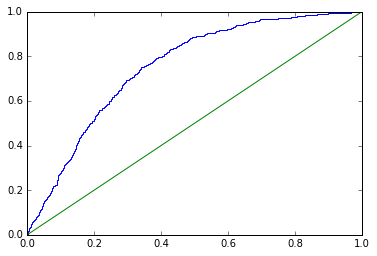

In [17]:
## Next let's evaluate how it does as a *Ranking Classifier*
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_prob_pred)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))

In [18]:
## Get the area under the curve
roc_auc_score(y_test,y_prob_pred)

0.75462247129598814

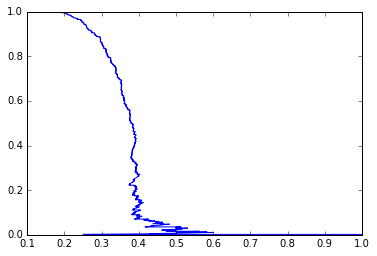

In [19]:
## Plot a precision-recall curve
from sklearn.metrics import precision_recall_curve
prec, recall, thresholds = precision_recall_curve(y_test,y_prob_pred)
plt.plot(prec[0:-1], recall[0:-1])

## Note: sklearn incorrectly adds a point at precision=1 and recall = 0
## For this reason, I remove the last point when I plot


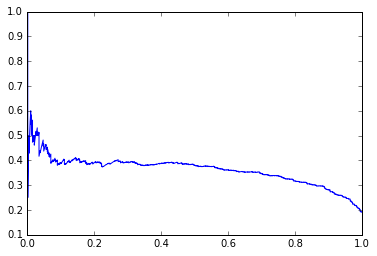

In [20]:
## Some people plot them the other way
plt.plot(recall[0:-1], prec[0:-1])


In [21]:
## What if we just use sklearn.predict?
from sklearn.metrics import confusion_matrix, precision_score, recall_score
y_pred_hard = lr_model_1.predict(X_test)
y_pred_hard

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
# rows are actual 0/1 columns are predicted 0/1

confusion_matrix(y_test, y_pred_hard)

array([[2404,   29],
       [ 544,   23]])

In [23]:
# This model is terrible: It predicts almost all zeros!
# My recall is really low.
# But is the model bad?  Or just a bad threshold?

precision_score(y_test, y_pred_hard),recall_score(y_test, y_pred_hard)

(0.44230769230769229, 0.040564373897707229)

In [24]:
# Let's try another threshold - similar precision, but much higher recall!

y_pred_hard_2 = (y_prob_pred>.3).astype(int)
precision_score(y_test, y_pred_hard_2),recall_score(y_test, y_pred_hard_2)

(0.38033395176252321, 0.36155202821869487)

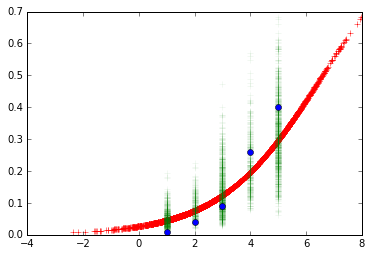

In [25]:
# How do our probabilistic predictions compare with what the "right" answer is?

plt.plot(X_test,y_prob_pred, 'r+')
plt.plot(x_clean[7000:],y_prob_pred, 'g+', alpha=.1)
plt.plot(range(1,6),real_prob_vec,'bo')